# Exercise 8
## Fundamentals of Machine Learning, WiSe 20/21
### Authors: Catherine Knobloch, Elias Olofsson, Julia Siegl
    Version information:
        2021-02-19: v.1.0. First public release. 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rc('image', cmap='gray')

from sklearn.datasets import load_digits
from sklearn import decomposition

# Produce inline vector graphics
%config InlineBackend.figure_format = 'svg'

## 2. Non-negative matrix factorization

In [2]:
digits = load_digits ()
X = digits["data"]/255.
Y = digits["target"]
print(X.shape, Y.shape)

(1797, 64) (1797,)


## 2.1 Comparison of scikit-learn’s NMF with SVD (6 pts)

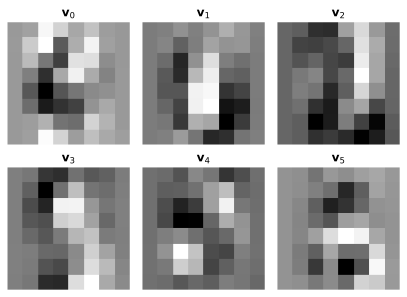

In [3]:
# Center the data for SVD
x_mean = X.mean(axis=0)
X_cent = X - x_mean

# Perform SVD
u, s, vh = np.linalg.svd(X_cent)

# Since numpy's SVD implementation sorts the singular values in descending order,
# we can simply index the first 6 columns of matrix vh, to acess the corresponding 
# basis vectors. Plotting these as images:
fsize = (5.6,4)
fig, ax = plt.subplots(2,3,figsize=fsize, constrained_layout=True, sharex=True,sharey=True)
ax = ax.flatten()
for i in range(6):
    ax[i].imshow(vh[i].reshape(8,8))
    ax[i].axis('off')
    ax[i].set_title(f'$\mathbf{{v}}_{{{i}}}$')
plt.show()

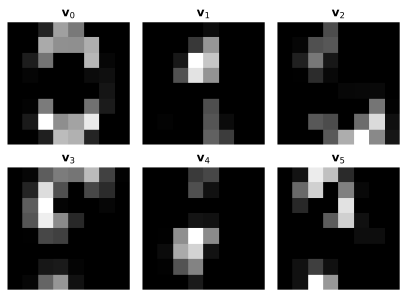

In [4]:
model = decomposition.NMF(n_components=10, init='random', random_state=0)
Z = model.fit_transform(X)
H = model.components_

fsize = (5.6,4)
fig, ax = plt.subplots(2,3,figsize=fsize, constrained_layout=True, sharex=True,sharey=True)
ax = ax.flatten()
for i in range(6):
    ax[i].imshow(H[i].reshape(8,8))
    ax[i].axis('off')
    ax[i].set_title(f'$\mathbf{{v}}_{{{i}}}$')
plt.show()

## 2.2 Implementation (6 pts)

In [5]:
def non_negative(data, num_components):
    
    # Random initialization of Z and H. 
    Z = np.abs(np.random.normal(size=(data.shape[0], num_components)))
    H = np.abs(np.random.normal(size=(num_components, data.shape[1])))
    
    res = []
    T = 10000
    for t in range(T):
        # Get factors
        c1 = (Z.T @ data)/np.clip(Z.T @ Z @ H, a_min=1e-7, a_max=None)
        c2 = (data @ H.T)/np.clip(Z @ H @ H.T, a_min=1e-7, a_max=None)
        
        # Update Z and H.
        H *= c1
        Z *= c2
        
        # Save residual
        res.append(0.5*np.linalg.norm(data-Z@H)**2)
    
    return Z, H, np.array(res)

In [6]:
print(Z.shape, H.shape, X.shape)

(1797, 10) (10, 64) (1797, 64)


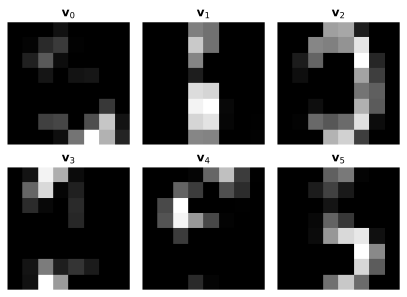

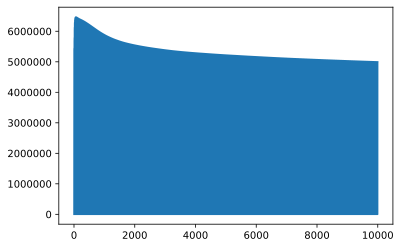

In [7]:
Z, H, res = non_negative(X, num_components=10)

fsize = (5.6,4)
fig, ax = plt.subplots(2,3,figsize=fsize, constrained_layout=True, sharex=True,sharey=True)
ax = ax.flatten()
for i in range(6):
    ax[i].imshow(H[i].reshape(8,8))
    ax[i].axis('off')
    ax[i].set_title(f'$\mathbf{{v}}_{{{i}}}$')
plt.show()

plt.plot(np.arange(len(res))[:], res[:])